## 9.6 Homework
### 1, From web
- 1, dowoload the data from http://www-personal.umich.edu/~mejn/cp/data/circular.txt
- 2, using Fourier transform to process the image and figure out how to compress the data.
- 3, compare it with the size which you obtained via plt.savefig()

### 2, Choose your own data or online data to play with DFT, IDFT and fitting with different functions.



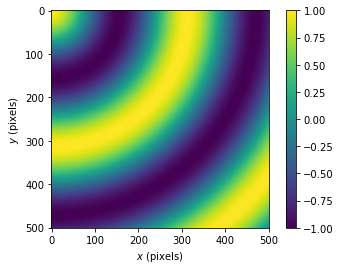

In [29]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("circular.txt", float)
plt.imshow(data)
plt.xlabel('Original')
# plt.savefig("original.png")
plt.colorbar()
plt.xlabel(r'$x$ (pixels)')
plt.ylabel(r'$y$ (pixels)')
plt.show()

The data is in a 501x501 array

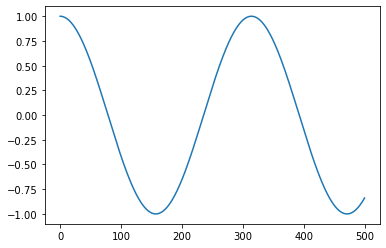

In [6]:
# by looking at the top row of the data we can see that it just makes plain sine plot

plt.plot(data[0])
plt.show()

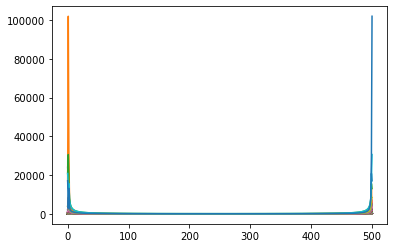

In [7]:
#now we take the fourier transform using numpy's fft in 2d

y1 = np.fft.fft2(data)
plt.plot(np.abs(y1))
plt.show()

Because the data array has a size of 501, there are then 501 plots that got made

In [17]:

y2 = np.copy(y1)           # copy coefficient matrix
discard2 = np.abs(y2) < 10 # identify elements of coefficient matrix to discard
y2[discard2] = 0           # set coefficients to discard to 0
e2 = 100*np.count_nonzero(discard2) / 251001
print(e2, "%") # 501 x 501 = 251,001

86.22595129103071 %


In [18]:
y3 = np.copy(y1)          
discard3 = np.abs(y3) < 100
y3[discard3] = 0        
e3 = 100*np.count_nonzero(discard3) / 251001
print(e3, "%")

98.0394500420317 %


In [19]:
y4 = np.copy(y1)          
discard4 = np.abs(y4) < 1000
y4[discard4] = 0        
e4 = 100*np.count_nonzero(discard4) / 251001
print(e4, "%")

99.88326739734104 %


In [24]:
y5 = np.copy(y1)          
discard5 = np.abs(y5) < 10000
y5[discard5] = 0        
e5 = 100*np.count_nonzero(discard5) / 251001
print(e5, "%")

99.99083668989367 %


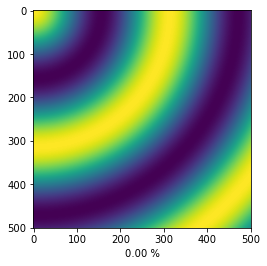

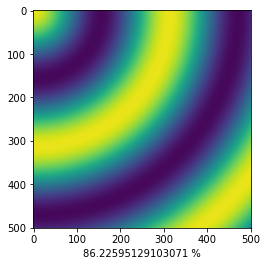

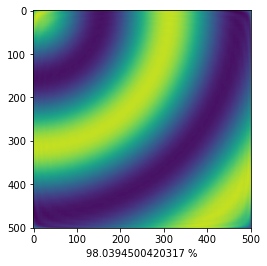

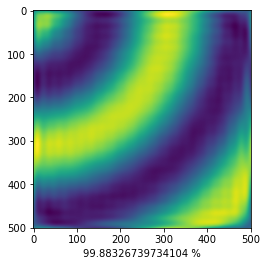

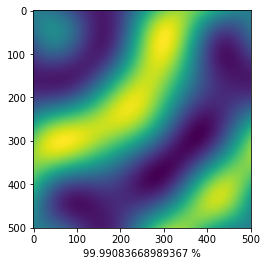

In [28]:
data2 = np.fft.ifft2(y2).real
data3 = np.fft.ifft2(y3).real
data4 = np.fft.ifft2(y4).real
data5 = np.fft.ifft2(y5).real

plt.imshow(data)
plt.xlabel("0.00 %")
plt.show()
plt.imshow(data2)
plt.xlabel(str(e2) + " %")
# plt.savefig("compressed2.png")
plt.show()
plt.imshow(data3)
plt.xlabel(str(e3) + " %")
# plt.savefig("compressed3.png")
plt.show()
plt.imshow(data4)
plt.xlabel(str(e4) + " %")
# plt.savefig("compressed4.png")
plt.show()
plt.imshow(data5)
plt.xlabel(str(e5) + " %")
# plt.savefig("compressed5.png")
plt.show()

There is only a slight loss in brightness between the original and discarding 86%, but otherwise it looks pretty normal.

Even discarding 98% doesn't make a that big of a difference

It takes until we've discarded 99.88% before it becomes obvious that the quality is starting to lack, however it could still be used. But discarding 99.99% of the original does start to become noticable, and would probably not be best to use.